<a href="https://colab.research.google.com/github/vinaydonthojuaiml/machine-learning-projects/blob/main/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1. Housing Price Prediction

Dataset Description: The data pertains to the houses found in each California district and some summary statistics about them based on the 1990 census data. It contains one instance per district block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The goal of this task is to design a regression model to predict the median house value conditioned upon a set of input attributes corresponding to a particular California district block.

The attributes in the dataset are as follows; their names are self-explanatory:
     

    longitude (continuous): One of the coordinates that are used to identify the California district block
     

    latitude (continuous): One of the coordinates that are used to identify the California district block
     

    housing_median_age (continuous): Average age of the house in California district block
     

    total_rooms (continuous): Total number of rooms of all the houses in the California district block
     

    total_bedrooms (continuous): Total number of bedrooms of all the houses in the California district block
     

    population (continuous): Number of people residing in the district block
     

    households (continuous): Number of families in the district block
     

    median_income (continuous): Median income for households in the district block of houses (measured in tens of thousands of US Dollars)  
     

    ocean_proximity (categorical): Location of the house. Is it inland, near the bay, near the ocean, etc.  
     

    median_house_value.(continuous): Median house value within a district block (measured in US Dollars)

Our target variable will be median_house_value.  Use the rest of the fields mentioned above to predict the median_house_value.

## Import Libraries
Import all necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

### b. Data Loading / Preprocessing

#### i. Loading

1. Load the California housing dataset using `pandas.read_csv()` function and store it in the variable (i.e., a pandas dataframe) named `df’.

2. The resulting data frame should have the shape (20640, 10) indicating that there are 20640 rows and 10 columns.

In [ ]:
df= pd.read_csv("housing.csv")
df.shape

(20640, 10)

3. Find the missing values in the data frame. If any (i.e., even if one column in each instance / row has a missing value), drop the row using `pandas.DataFrame.dropna()` function. The resulting data frame should have the shape (20433, 10) indicating that there are 20433 rows and 10 columns.

In [ ]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df = df.dropna()
df.shape

(20433, 10)

4. Create a data frame `corr_df` by dropping the columns latitude, longitude, and ocean_proximity using the `pandas.DataFrame.drop()` function. Use the Pearson correlation to find the correlation of each remaining feature in the `corr_df` with the target variable `median_house_value` using the function `pandas.DataFrame.corrwith()`.

In [ ]:
corr_df = df.drop(['latitude', 'longitude', 'ocean_proximity'], axis=1)
correlations = corr_df.corrwith(df['median_house_value'])
correlations

housing_median_age    0.106432
total_rooms           0.133294
total_bedrooms        0.049686
population           -0.025300
households            0.064894
median_income         0.688355
median_house_value    1.000000
dtype: float64

#### ii. Data Visualization

1. Use `pandas.DataFrame.hist(bins = 50)` function for visualizing the variation on the columns housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value. Plot each histogram as a separate subplot.

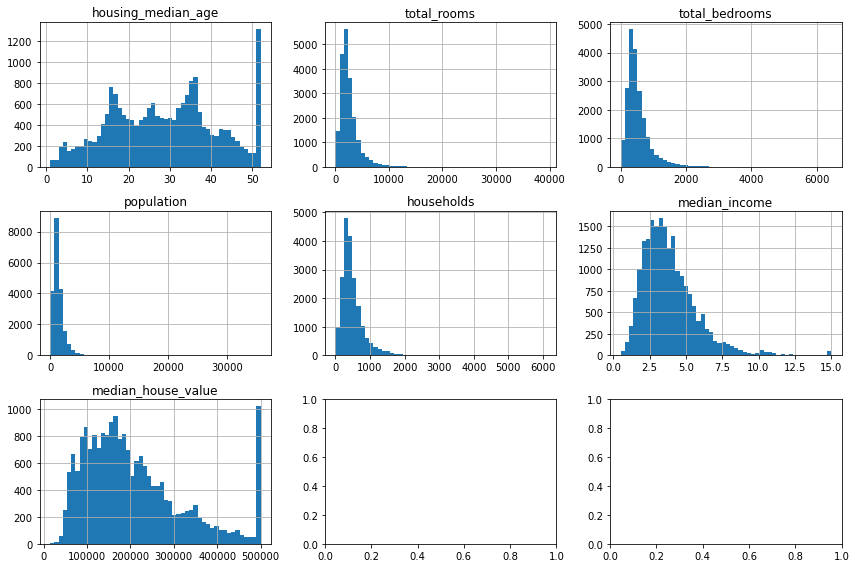

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))

df[['housing_median_age', 'total_rooms', 'total_bedrooms']].hist(bins=50, ax=axs[0, 0:3].ravel())
df[['population', 'households', 'median_income']].hist(bins=50, ax=axs[1, 0:3].ravel())
df[['median_house_value']].hist(bins=50, ax=axs[2:,0:1].ravel())

plt.tight_layout()
plt.show()

2. Use `pandas.dataframe.describe()` function to find the mean, median and standard deviations for each feature and report in the jupyter notebook.

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
from

Create a data frame `X` of features (by dropping the column `median_house_value` from the original data frame) using the `pandas.DataFrame.drop()` function. Create a Series object of targets `Y` (by only considering the `median_house_value` column from the original data frame (Do NOT use the `corr_df` data frame in this step. Use the data frame which was obtained as a result of step 3 above).

In [ ]:
# Create X by dropping the "median_house_value" column
X = df.drop('median_house_value', axis=1)

# Create Y by selecting the "median_house_value" column
Y = df['median_house_value']

3. Use `pandas.get_dummies` to convert categorical variables into dummy /one-hot encoding. In this case the categorical column is ocean_proximity

In [ ]:
# create a new DataFrame with one-hot encoded columns for ocean_proximity
ocean_proximity_dummies = pd.get_dummies(X['ocean_proximity'], prefix='ocean_proximity')
# add the one-hot encoded columns to the original DataFrame
X = pd.concat([X, ocean_proximity_dummies], axis=1)
# drop the original ocean_proximity column
X = X.drop('ocean_proximity', axis=1)
X.shape

(20433, 13)

#### iii. Data Splitting

1. Split data into training and test sets using the sklearn `train_test_split()` function. Perform 70-30 distribution i.e. 70% training and 30% testing. The result of your data split should yield 4 separate data frames `X_train, X_test, y_train, y_test`. (respectively, the training features, testing features, training targets and testing target).

In [ ]:
# split the data into training and test sets, with a 70-30 distribution
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
#Storing the column names
X_columns=X.columns
y_columns = ["median_house_value"]
X_columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

#### iv. Data Scaling

1. Use the `StandardScaler()` to instantiate the standard scaler class. Note: You will need two separate scaler objects, one to scale the features, another to scale the target values.

In [ ]:
from sklearn.preprocessing import StandardScaler
# create separate scaler objects for features and target values
scaler_X = StandardScaler()
scaler_y = StandardScaler()

2. For each scaler, employ the `fit_transform()` function (only on the training  features, training targets) of the scaler to retrieve the new (scaled) version of the data. Store them in `X_train`, and `y_train` again

In [ ]:
# fit the scaler objects to the training data and transform the training data
X_train = scaler_X.fit_transform(X_train)
y_train = scaler_y.fit_transform(y_train.values.reshape(-1,1))

3. Scale the `X_test` and `y_test` as well and store the scaled values back in `X_test` and `y_test`. (i.e., use the appropriate “fitted” scaler above to “transform” the test data. Note: the function to be employed in this case is `transform()` as opposed to `fit_transform()`).  
Henceforth, `X_train, y_train, X_test, y_test` will refer to the scaled data unless stated otherwise.

In [ ]:
# transform the test data using the fitted scaler objects
X_test = scaler_X.transform(X_test)
y_test = scaler_y.transform(y_test.values.reshape(-1,1))

### c. Modelling

#### i. Employ Linear Regression from sklearn.linear_model, and instantiate the model.

In [ ]:
lin_reg = LinearRegression()

#### ii. Once instantiated, `fit()` the model using the scaled `X_train, y_train` data.

In [ ]:
lin_reg.fit(X_train, y_train)

LinearRegression()

#### iii. Employ the `predict()` function to obtain predictions on `X_test`. Store the predictions in a variable named `y_preds`. Note: Since the model has been trained on scaled data (i.e., both features and targets, the predictions will also be in the “scaled” space. We need to transform the predictions back to the original space).

In [ ]:
# obtain predictions on X_test
y_preds = lin_reg.predict(X_test)

In [ ]:
y_preds

array([[-0.04483333],
       [-0.51814817],
       [ 0.01245373],
       ...,
       [-0.55279411],
       [-1.36720465],
       [-0.98559782]])

In [ ]:
y_test

array([[ 0.33370662],
       [-0.6011497 ],
       [ 0.09457748],
       ...,
       [-1.03002261],
       [-1.1244613 ],
       [-1.16431615]])

#### iv. Use `inverse_transform()` function to convert the normalized data (`y_preds` ) to original scale. Store the transformed values back into `y_preds`.

In [ ]:
# transform predictions back to original space
y_preds = scaler_y.inverse_transform(y_preds)

In [ ]:
y_preds

array([[202109.37052289],
       [147479.93670238],
       [208721.37459757],
       ...,
       [143481.14370264],
       [ 49482.85200095],
       [ 93527.45605917]])

2. Calculate the total percentage of variance captured by the 2 PCA components using `pca.explained_variance_ratio_`. Also, report the strength of each PCA component using `pca.singular_values_`.

### d. Evaluation

#### i. Plot a scatter plot using matplotlib.pyplot.scatter function. Plot the predicted median house values on the y-axis vs the actual median house values on the x-axis

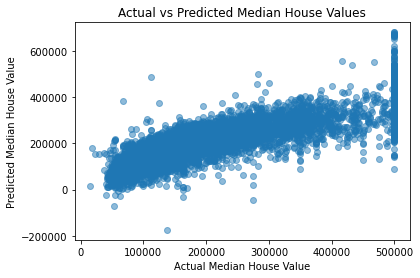

In [ ]:
# transform the predicted values back to original space
y_test = scaler_y.inverse_transform(y_test)

# plot actual vs predicted values
plt.scatter(y_test, y_preds, alpha=0.5)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Values')
plt.show()

#### ii. Calculate MAPE, RMSE and R2 for the model and report them in the following table.  
Hint: for RMSE set the squared parameter to False.

In [ ]:
# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_preds)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_preds, squared=False)

# Calculate R2
r2 = r2_score(y_test, y_preds)

# Print the results
print("MAPE:", mape)
print("RMSE:", rmse)
print("R2:", r2)


MAPE: 0.28734868915069756
RMSE: 67927.63804195386
R2: 0.6538753735673424
